In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Steps before preprocessing

In [ ]:
# creates two separate folders to store train and validation images per skin cancer name
import os 
import errno

os.mkdir("/content/drive/MyDrive/data/base_dir")
image_class = ['nv','mel','bkl','bcc','akiec','vasc','df']

# Makes 3 directories, base_dir, train_dir inside base_dir, and val_dir inside base_dir
try:
    os.mkdir("/content/drive/MyDrive/data/base_dir")
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

train_dir = os.path.join("/content/drive/MyDrive/data/base_dir", 'train_dir')
try:
  os.mkdir(train_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

val_dir = os.path.join("/content/drive/MyDrive/data/base_dir", 'val_dir')
try: 
  os.mkdir(val_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

try: 
  for x in image_class:
    os.mkdir(train_dir+'/'+x)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

try: 
  for x in image_class:
    os.mkdir(val_dir+'/'+x)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os

In [3]:
#reading dataframe
balanced_df = pd.read_csv('/content/drive/MyDrive/data/dataframe.csv', index_col= False)

In [4]:
balanced_df = balanced_df.drop('Unnamed: 0',axis=1)

In [5]:
df = balanced_df.copy()

In [6]:
y = df.dx

In [ ]:
#splitting dataframe 90/10 stratifying y
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.1, random_state=101, stratify=y)

In [ ]:
image_index = df.set_index('image_id', inplace=True)

In [ ]:
#creating two lists of image ids stored in the train and val data
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

In [70]:
y_train = []
y_valid = []

In [ ]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('/content/drive/MyDrive/data/HAM10000_images_part_1')
folder_2 = os.listdir('/content/drive/MyDrive/data/HAM10000_images_part_2')

In [ ]:
import shutil

In [ ]:
#transferring the training images
for image in train_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/data/HAM10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/data/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


In [ ]:
#transferring the validation images
for image in val_list:

    fname = image + '.jpg'
    label = df.loc[image, 'dx']

    if fname in folder_1:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/data/HAM10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('/content/drive/MyDrive/data/HAM10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

Preprocessing

In [7]:
#importing necessary libraries again
from keras.preprocessing.image import ImageDataGenerator
import keras 
print(df.head())
image_class = ['nv','mel','bkl','bcc','akiec','vasc','df']

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [8]:
train_path = '/content/drive/MyDrive/data/base_dir/train_dir/'
valid_path = '/content/drive/MyDrive/data/base_dir/val_dir/'

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
#encoding the classes
Encoder_X = LabelEncoder()
for col in df.columns:
  if df.dtypes[col] == 'object':
    df[col] = col + '_' + df[col].map(str)
    df[col] = Encoder_X.fit_transform(df[col])
y_train = df['dx']

In [73]:
from numpy import array 
from tensorflow.keras.utils import to_categorical

y = array(y_train)
y = to_categorical(y)

In [10]:
#preprocessing and resizing images
image_size = 224
num_train_samples = 42296
num_val_samples = 4700
train_batch_size = 100
val_batch_size = 100
t = ImageDataGenerator(preprocessing_function=preprocess_input)
v = ImageDataGenerator(preprocessing_function=preprocess_input)
train_batches = t.flow_from_directory(train_path,
                                    target_size=(image_size, image_size),classes = image_class,
                                    batch_size=train_batch_size)

valid_batches = v.flow_from_directory(
                                    valid_path,
                                    target_size=(image_size, image_size),classes = image_class,
                                    batch_size=val_batch_size)

Found 42296 images belonging to 7 classes.
Found 4700 images belonging to 7 classes.


In [11]:
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

Tranfer Learning





In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_accuracy
from tensorflow.keras import losses
from keras.applications.mobilenet import preprocess_input
from PIL import Image

In [12]:
#importing model
mobile = keras.applications.mobilenet.MobileNet(weights='imagenet',input_shape=(224,224,3),include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [13]:
#model without the first 6 layers
x = mobile.layers[-6].output

# Adds a dropout, an average pooling layer, and dense layer for predictions

x= keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

In [14]:
model=Model(inputs=mobile.input,outputs=predictions)

In [15]:
# Freeze the weights of the layers that we aren't training (training the last 23)
for layer in model.layers[:-23]:
    layer.trainable=False

In [16]:
#model compilation
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

In [18]:
history = model.fit(train_batches,
                              steps_per_epoch=train_steps,
                              epochs=10,
                              verbose=1)

Epoch 1/10
91/91 [==============================] - 3007s 33s/step - loss: 0.9675 - accuracy: 0.6731
Epoch 2/10
91/91 [==============================] - 2339s 26s/step - loss: 0.4450 - accuracy: 0.8423
Epoch 3/10
91/91 [==============================] - 1831s 20s/step - loss: 0.2994 - accuracy: 0.8923
Epoch 4/10
91/91 [==============================] - 1501s 16s/step - loss: 0.2518 - accuracy: 0.9061
Epoch 5/10
91/91 [==============================] - 1215s 13s/step - loss: 0.1970 - accuracy: 0.9299
Epoch 6/10
91/91 [==============================] - 981s 11s/step - loss: 0.1666 - accuracy: 0.9385
Epoch 7/10
91/91 [==============================] - 808s 9s/step - loss: 0.1286 - accuracy: 0.9554
Epoch 8/10
91/91 [==============================] - 699s 8s/step - loss: 0.1030 - accuracy: 0.9636
Epoch 9/10
91/91 [==============================] - 648s 7s/step - loss: 0.1027 - accuracy: 0.9648
Epoch 10/10
91/91 [==============================] - 600s 7s/step - loss: 0.0804 - accuracy: 0.970

In [19]:
model.save("model.h5")

In [20]:
acc_valid = model.evaluate(valid_batches)
print(acc_valid)

47/47 [==============================] - 1459s 32s/step - loss: 0.3557 - accuracy: 0.8872
[0.3557277023792267, 0.8872340321540833]


In [22]:
predictions = model.predict(valid_batches,verbose=1)

47/47 [==============================] - 172s 4s/step


Plotting the Results via Confusion Matrix and Graphs

In [21]:
#importing libraries to be able to plot confusion matrix and graphs
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
test_labels = valid_batches.classes

Confusion matrix, without normalization
[[ 98 118  71  86  80  96 121]
 [ 89 104  71  87  89 104 127]
 [117 118  74  76  74 114  98]
 [ 90 107  76  98  73 112 116]
 [113 122  73  77  71 104 111]
 [101 135  66  74  62 108 126]
 [111 121  56  89  70 107 119]]


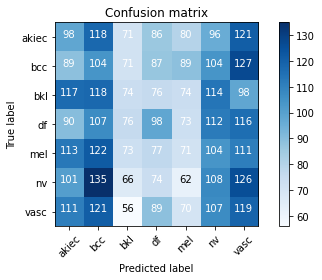

In [77]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
predfinal = predictions.argmax(axis=1)
cm = confusion_matrix(test_labels, predfinal)

cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels)

In [64]:
# Function to plot model's train loss and train accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[0].set_title('Augmented Images MobileNet Model Results')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['accuracy','loss'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


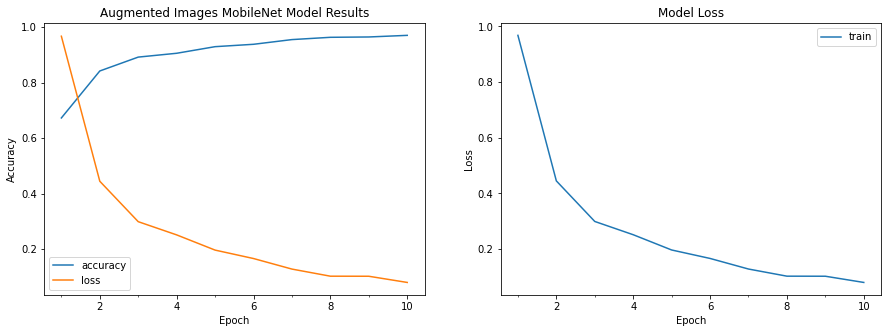

In [65]:
plot_model_history(history)